# Task-1 : Movie Genre Classification

>> Description: Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines

## Collecting & Unzipping data

In [2]:
import zipfile
data=zipfile.ZipFile('archive.zip')
data.extractall()
data.close()

## Importing Dependcenies & Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

In [4]:
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [6]:
train_path='./Genre Classification Dataset/train_data.txt'
train_data=pd.read_csv(train_path,sep=':::', engine='python',names=['id','title', 'genre','description'])

In [7]:
train_data.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
train_data.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [10]:
# Checking null values in train_data
train_data.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

Note : That means the train_data has no null values

In [11]:
test_path='./Genre Classification Dataset/test_data.txt'
test_data=pd.read_csv(test_path,sep=':::',engine='python',names=['id','title','description'])

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


## Visualizing data

Plotting the distribution of genres in the train_data

Text(0, 0.5, 'Genre')

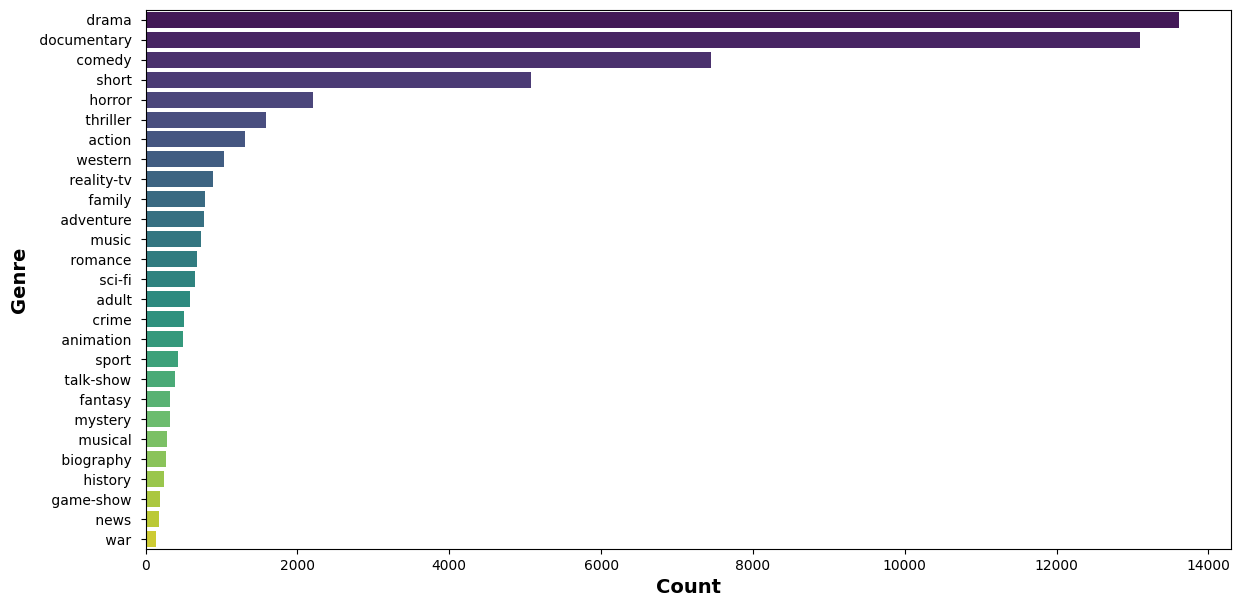

In [13]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='genre', order=train_data['genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

Plot the distribution of genres using a bar plot

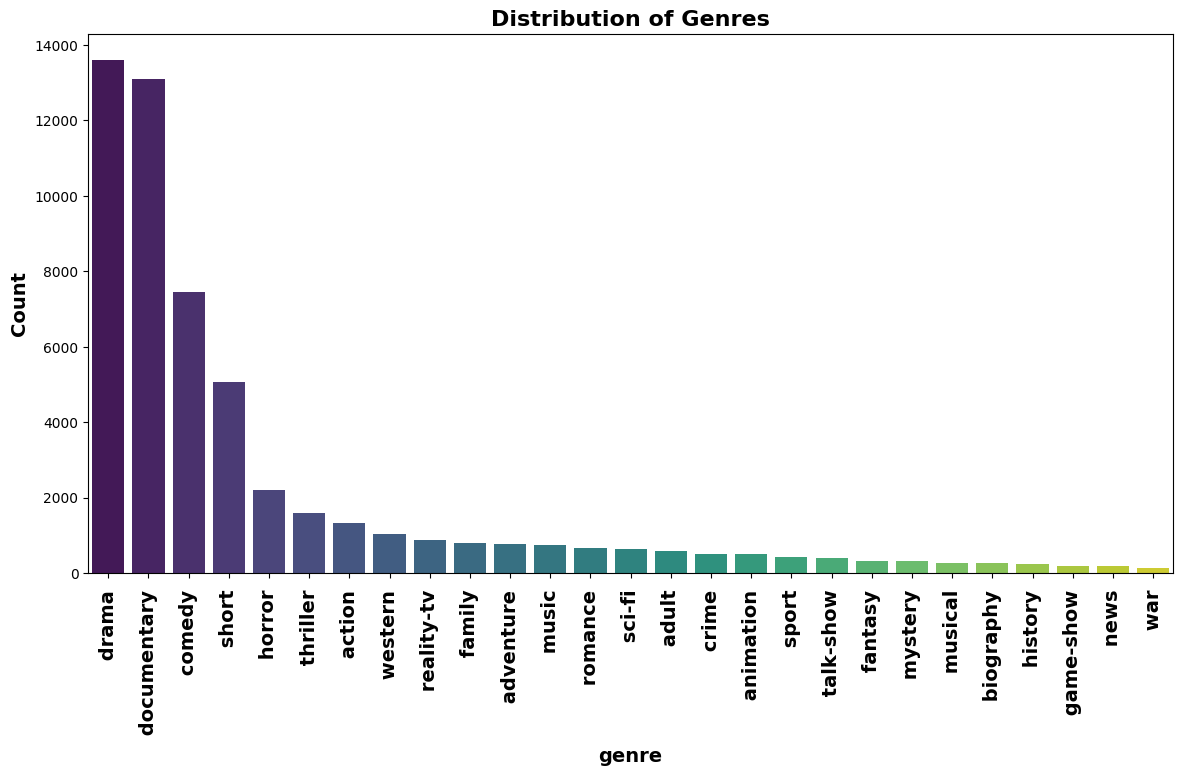

In [14]:
plt.figure(figsize=(14, 7))
counts = train_data['genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()


## Preprocessing the data

In [15]:
nltk.download('all')
stemmer=LancasterStemmer()
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [18]:
# Cleaning the data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

In [20]:
train_data['cleaned_text']=train_data['description'].apply(clean_text)
test_data['cleaned_text']=test_data['description'].apply(clean_text)

## TFIDF Vectorizing

In [22]:
tf_idf=TfidfVectorizer()
X_train=tf_idf.fit_transform(train_data['cleaned_text'])
X_test=tf_idf.transform(test_data['cleaned_text'])

## Splitting the data

In [23]:
y=train_data['genre']
x_train,x_test,y_train,y_test=train_test_split(X_train,y,test_size=0.2,random_state=23)

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((43371, 124210), (43371,), (10843, 124210), (10843,))

In [31]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import VotingClassifier

In [33]:
naive_model=MultinomialNB()
naive_model.fit(x_train,y_train)
y_pred=naive_model.predict(x_test)
print(f'Accuracy score : {accuracy_score(y_pred,y_test)}')

Accuracy score : 0.4440652955824034


In [35]:
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
print(f'Accuracy score : {accuracy_score(y_pred,y_test)}')

Accuracy score : 0.5828645208890528


In [36]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f'Accuracy score : {accuracy_score(y_pred,y_test)}')

Accuracy score : 0.5705985428386978


In [37]:
import pickle
pickle.dump(train_data,open('train_data_cleaned.pkl','wb'))
pickle.dump(naive_model,open('naive_bayes_model.pkl','wb'))
pickle.dump(lr_model,open('logistic_regression_model.pkl','wb'))
pickle.dump(svc,open('support_vector_machine_model.pkl','wb'))